In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report
import pandas as pd
import json
import importlib
import math



try:
    from IPython import get_ipython
    if 'IPKernelApp' not in get_ipython().config:  # Not in a notebook
        from tqdm import tqdm
    else:  # In a notebook
        from tqdm.notebook import tqdm
except ImportError:  # IPython is not installed
    from tqdm import tqdm
import utils
from utils import *

# importlib.reload(utils)


# 2. set up for using GPU if available (with printed confirmation)  
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# 3. checking environment 
try:
    from google.colab import drive
    drive.mount('/content/drive')
    IN_COLAB = True
except:
    IN_COLAB = False

Using cuda device


In [5]:
# model_test = BaselineNet().to(device)
# summary(model_test, (3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
         MaxPool2d-2           [-1, 16, 16, 16]               0
            Conv2d-3           [-1, 32, 16, 16]           4,640
         MaxPool2d-4             [-1, 32, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          18,496
         MaxPool2d-6             [-1, 64, 4, 4]               0
            Linear-7                   [-1, 64]          65,600
            Linear-8                   [-1, 10]             650
Total params: 89,834
Trainable params: 89,834
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.27
Params size (MB): 0.34
Estimated Total Size (MB): 0.63
----------------------------------------------------------------


BaselineNet(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

In [9]:
batch_size = 64

torch.manual_seed(0)

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_data = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform)

num_validation_samples = 5000
num_train_samples = len(train_data) - num_validation_samples

train_data, val_data = random_split(train_data, [num_train_samples, num_validation_samples])

print(len(train_data)) # 50000 training egs  
print(len(val_data)) # 10000 test egs
print(len(test_data)) # 10000 test egs

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
45000
5000
10000


In [13]:
print(list(range(1)))

[0]


LR:  0.1
lr:  0.1
seed: 1


Epoch [1/50] - Train Loss: 1.8357, Acc: 0.3285 | Val Loss: 1.6591, Acc: 0.3795
Epoch [2/50] - Train Loss: 1.3604, Acc: 0.5121 | Val Loss: 2.7935, Acc: 0.2322
Epoch [3/50] - Train Loss: 1.1564, Acc: 0.5903 | Val Loss: 1.4100, Acc: 0.5384
Epoch [4/50] - Train Loss: 1.0145, Acc: 0.6403 | Val Loss: 1.4509, Acc: 0.5053
Epoch [5/50] - Train Loss: 0.9104, Acc: 0.6760 | Val Loss: 1.0199, Acc: 0.6325
Epoch [6/50] - Train Loss: 0.8282, Acc: 0.7074 | Val Loss: 1.1217, Acc: 0.6197
Epoch [7/50] - Train Loss: 0.7551, Acc: 0.7334 | Val Loss: 1.2358, Acc: 0.6021
Epoch [8/50] - Train Loss: 0.6969, Acc: 0.7536 | Val Loss: 1.3859, Acc: 0.5714
Epoch [9/50] - Train Loss: 0.6453, Acc: 0.7714 | Val Loss: 1.5825, Acc: 0.5409
Epoch [10/50] - Train Loss: 0.5967, Acc: 0.7890 | Val Loss: 1.3302, Acc: 0.6369
Epoch [11/50] - Train Loss: 0.5512, Acc: 0.8038 | Val Loss: 2.3610, Acc: 0.4871
Epoch [12/50] - Train Loss: 0.5168, Acc: 0.8158 | Val Loss: 1.4240, Acc: 0.6262
Epoch [13/50] - Train Loss: 0.4752, Acc: 0.8310 |

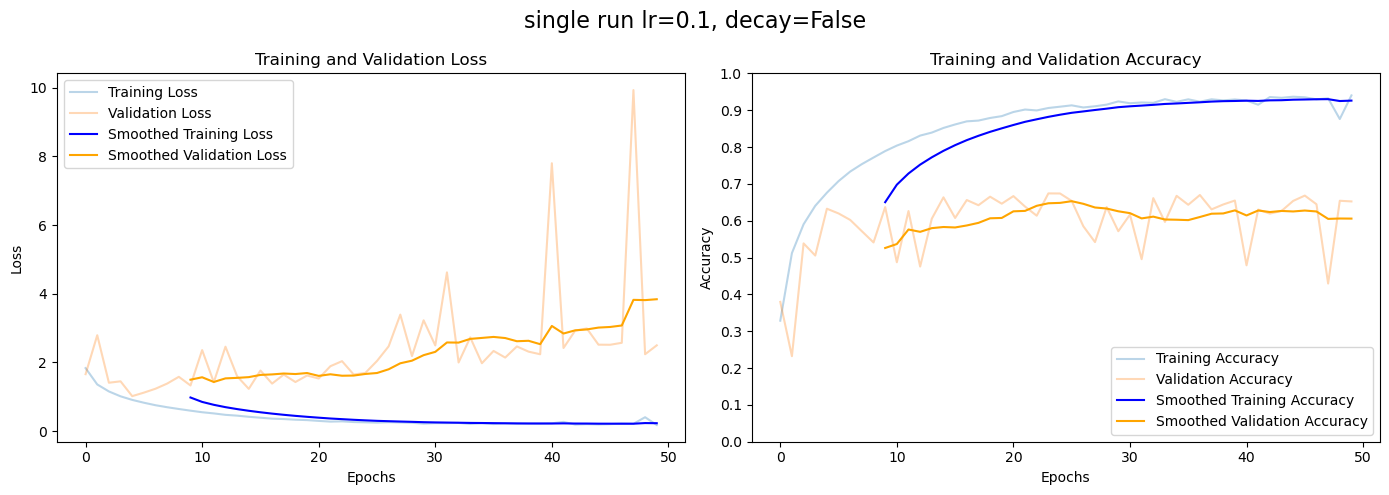

TESTING COMPLETE!!
Test Loss: 2.4527, Test Acc: 0.6544
              precision    recall  f1-score   support

       plane       0.76      0.62      0.68      1000
         car       0.78      0.83      0.81      1000
        bird       0.63      0.49      0.55      1000
         cat       0.40      0.54      0.46      1000
        deer       0.66      0.50      0.57      1000
         dog       0.52      0.56      0.54      1000
        frog       0.76      0.68      0.72      1000
       horse       0.71      0.75      0.73      1000
        ship       0.68      0.88      0.77      1000
       truck       0.76      0.69      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.65     10000
weighted avg       0.67      0.65      0.65     10000

lr:  0.1
seed: 2
Epoch [1/50] - Train Loss: 1.8290, Acc: 0.3306 | Val Loss: 1.6646, Acc: 0.4264
Epoch [2/50] - Train Loss: 1.3518, Acc: 0.5134 | Val Loss: 1.3872, Acc: 0.4978
Epoch [3/50

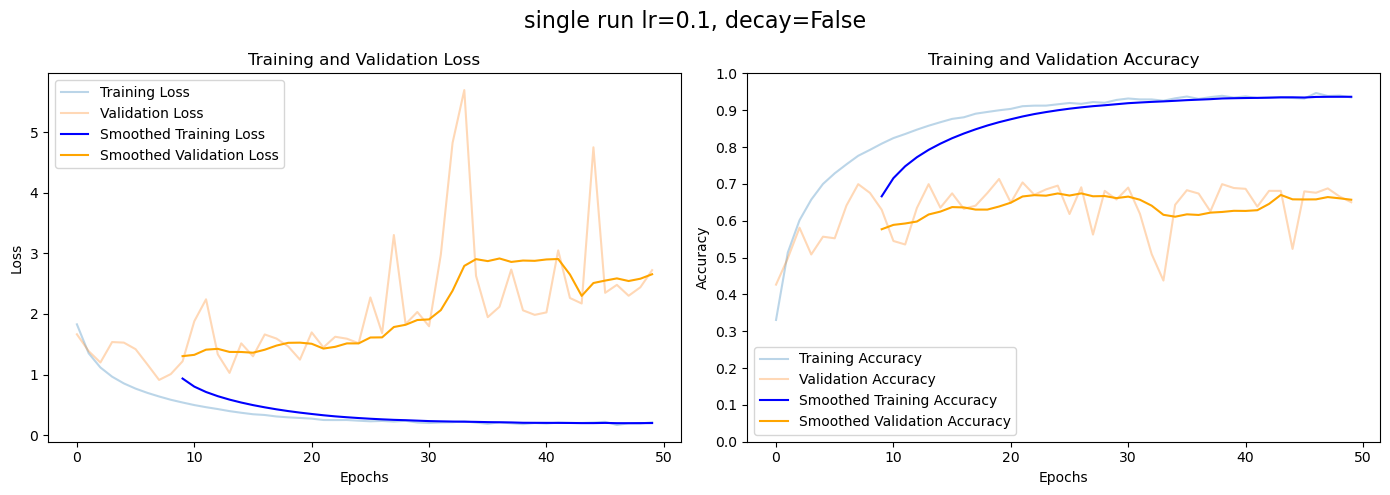

TESTING COMPLETE!!
Test Loss: 2.7832, Test Acc: 0.6481
              precision    recall  f1-score   support

       plane       0.80      0.55      0.65      1000
         car       0.89      0.68      0.77      1000
        bird       0.45      0.64      0.53      1000
         cat       0.50      0.42      0.46      1000
        deer       0.64      0.48      0.55      1000
         dog       0.55      0.57      0.56      1000
        frog       0.69      0.74      0.71      1000
       horse       0.72      0.72      0.72      1000
        ship       0.73      0.82      0.78      1000
       truck       0.66      0.85      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000

lr:  0.1
seed: 3
Epoch [1/50] - Train Loss: 1.8361, Acc: 0.3288 | Val Loss: 2.1704, Acc: 0.3068
Epoch [2/50] - Train Loss: 1.3326, Acc: 0.5213 | Val Loss: 1.4062, Acc: 0.4737
Epoch [3/50

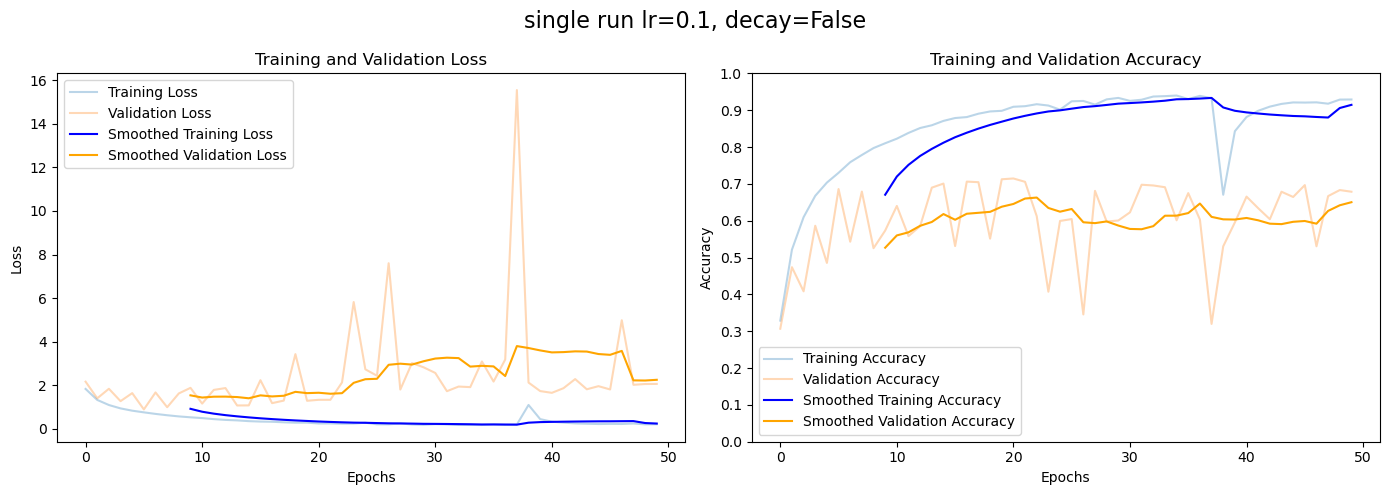

TESTING COMPLETE!!
Test Loss: 2.0680, Test Acc: 0.6838
              precision    recall  f1-score   support

       plane       0.69      0.73      0.71      1000
         car       0.82      0.85      0.83      1000
        bird       0.55      0.54      0.55      1000
         cat       0.51      0.46      0.48      1000
        deer       0.63      0.62      0.63      1000
         dog       0.60      0.58      0.59      1000
        frog       0.69      0.78      0.73      1000
       horse       0.73      0.71      0.72      1000
        ship       0.82      0.78      0.80      1000
       truck       0.77      0.80      0.79      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

lr:  0.1
seed: 4
Epoch [1/50] - Train Loss: 1.8478, Acc: 0.3222 | Val Loss: 1.9391, Acc: 0.2992
Epoch [2/50] - Train Loss: 1.3237, Acc: 0.5221 | Val Loss: 2.7778, Acc: 0.2911
Epoch [3/50

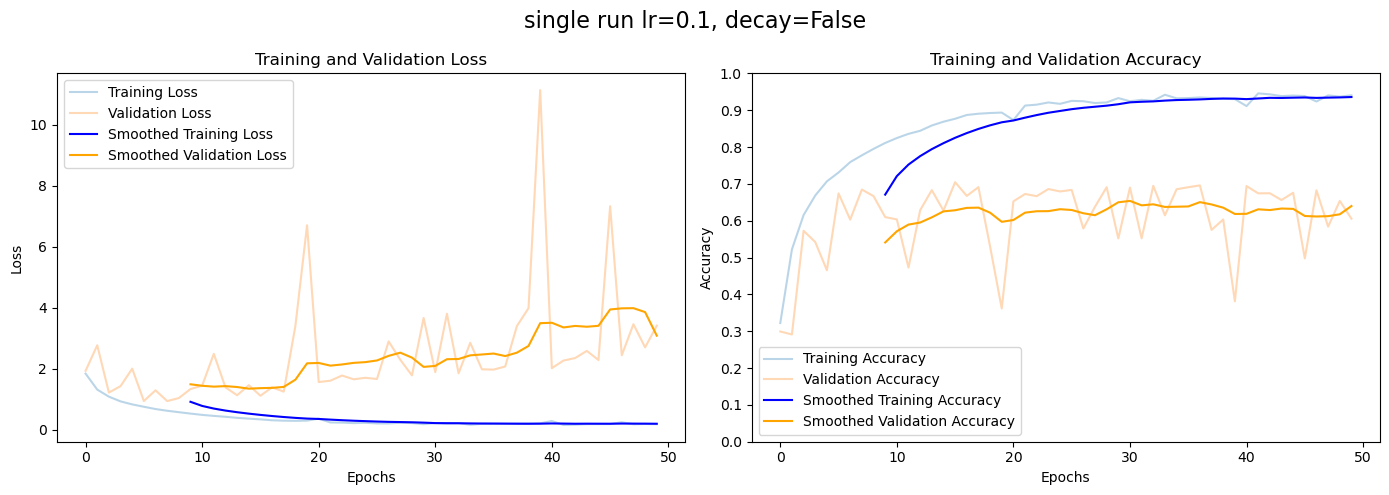

TESTING COMPLETE!!
Test Loss: 3.5463, Test Acc: 0.6005
              precision    recall  f1-score   support

       plane       0.74      0.32      0.44      1000
         car       0.79      0.68      0.73      1000
        bird       0.53      0.56      0.54      1000
         cat       0.42      0.49      0.45      1000
        deer       0.56      0.61      0.59      1000
         dog       0.61      0.50      0.55      1000
        frog       0.76      0.62      0.68      1000
       horse       0.71      0.71      0.71      1000
        ship       0.47      0.91      0.62      1000
       truck       0.75      0.62      0.68      1000

    accuracy                           0.60     10000
   macro avg       0.63      0.60      0.60     10000
weighted avg       0.63      0.60      0.60     10000

lr:  0.1
seed: 5
Epoch [1/50] - Train Loss: 1.7786, Acc: 0.3512 | Val Loss: 2.0974, Acc: 0.3200
Epoch [2/50] - Train Loss: 1.3280, Acc: 0.5204 | Val Loss: 1.6370, Acc: 0.4227
Epoch [3/50

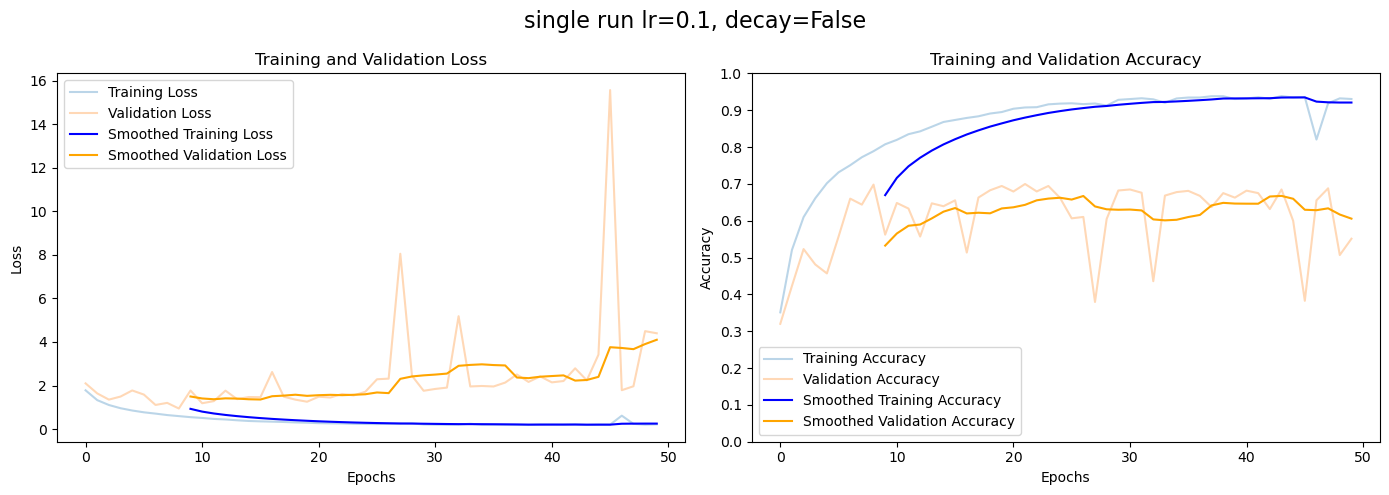

TESTING COMPLETE!!
Test Loss: 4.4100, Test Acc: 0.5447
              precision    recall  f1-score   support

       plane       0.81      0.52      0.63      1000
         car       0.86      0.24      0.37      1000
        bird       0.47      0.52      0.49      1000
         cat       0.34      0.57      0.43      1000
        deer       0.56      0.51      0.53      1000
         dog       0.59      0.44      0.51      1000
        frog       0.66      0.68      0.67      1000
       horse       0.70      0.65      0.67      1000
        ship       0.84      0.46      0.60      1000
       truck       0.40      0.87      0.55      1000

    accuracy                           0.54     10000
   macro avg       0.62      0.54      0.54     10000
weighted avg       0.62      0.54      0.54     10000



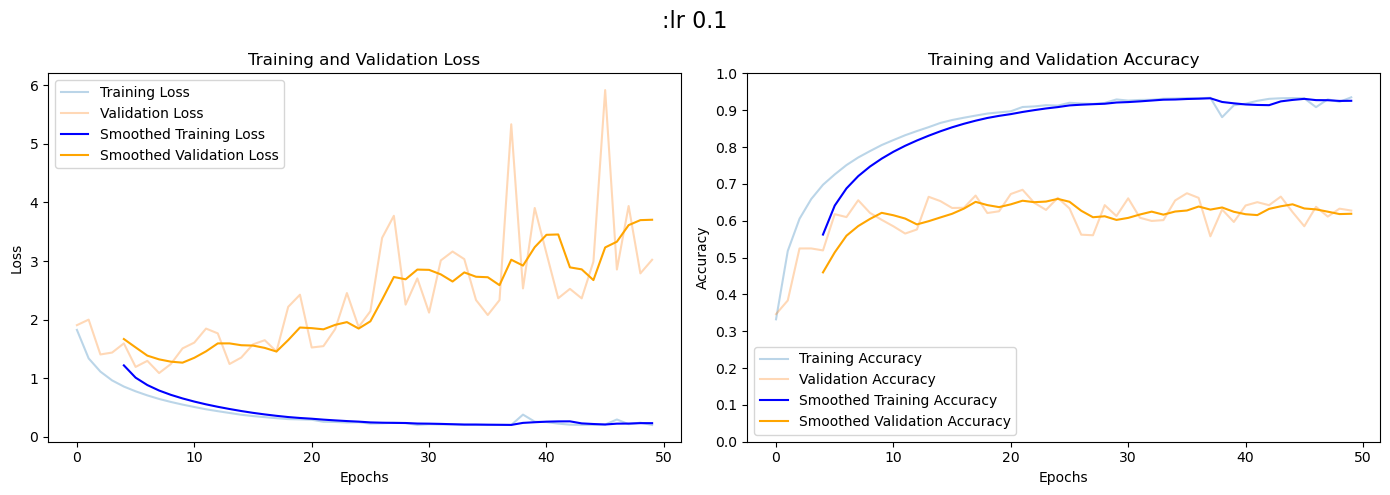

LR:  0.075
lr:  0.075
seed: 1
Epoch [1/50] - Train Loss: 1.8911, Acc: 0.3056 | Val Loss: 1.7048, Acc: 0.3594
Epoch [2/50] - Train Loss: 1.4133, Acc: 0.4907 | Val Loss: 2.3459, Acc: 0.2706
Epoch [3/50] - Train Loss: 1.2135, Acc: 0.5700 | Val Loss: 1.4773, Acc: 0.4913
Epoch [4/50] - Train Loss: 1.0730, Acc: 0.6202 | Val Loss: 1.2515, Acc: 0.5619
Epoch [5/50] - Train Loss: 0.9642, Acc: 0.6599 | Val Loss: 1.1838, Acc: 0.5833
Epoch [6/50] - Train Loss: 0.8785, Acc: 0.6896 | Val Loss: 1.2237, Acc: 0.5959
Epoch [7/50] - Train Loss: 0.8041, Acc: 0.7176 | Val Loss: 1.5047, Acc: 0.5305
Epoch [8/50] - Train Loss: 0.7454, Acc: 0.7367 | Val Loss: 1.2881, Acc: 0.5669
Epoch [9/50] - Train Loss: 0.6918, Acc: 0.7582 | Val Loss: 1.2274, Acc: 0.5979
Epoch [10/50] - Train Loss: 0.6403, Acc: 0.7737 | Val Loss: 1.2357, Acc: 0.6234
Epoch [11/50] - Train Loss: 0.5937, Acc: 0.7918 | Val Loss: 1.6934, Acc: 0.5528
Epoch [12/50] - Train Loss: 0.5565, Acc: 0.8027 | Val Loss: 1.4534, Acc: 0.6173
Epoch [13/50] - Tra

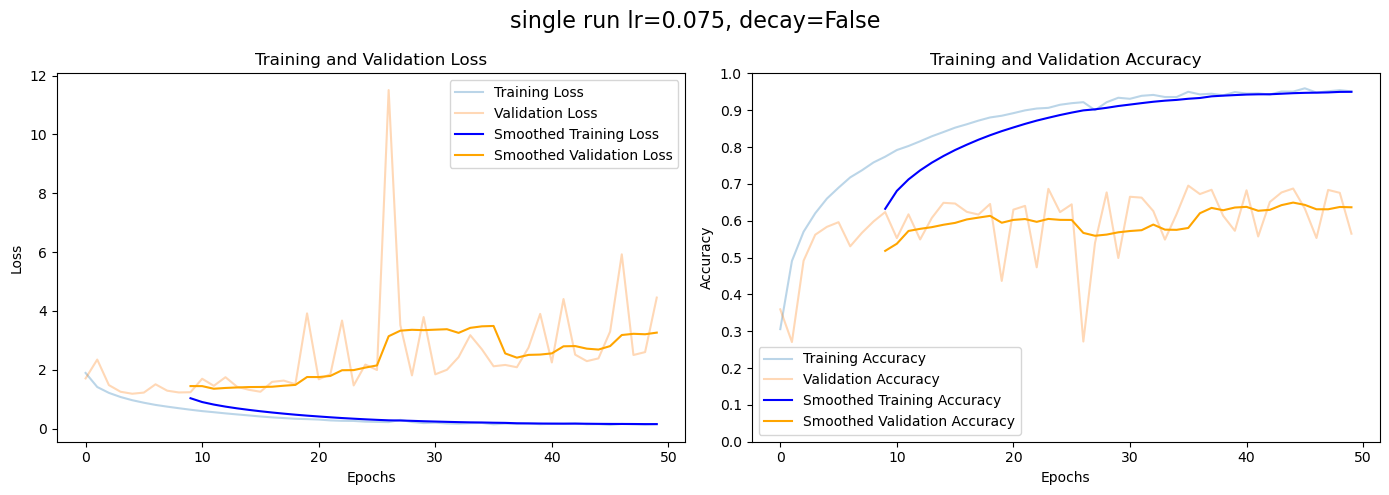

TESTING COMPLETE!!
Test Loss: 4.3956, Test Acc: 0.5676
              precision    recall  f1-score   support

       plane       0.61      0.69      0.65      1000
         car       0.82      0.70      0.75      1000
        bird       0.37      0.62      0.46      1000
         cat       0.43      0.39      0.41      1000
        deer       0.40      0.77      0.53      1000
         dog       0.66      0.33      0.44      1000
        frog       0.81      0.15      0.25      1000
       horse       0.79      0.59      0.68      1000
        ship       0.63      0.85      0.73      1000
       truck       0.81      0.58      0.68      1000

    accuracy                           0.57     10000
   macro avg       0.63      0.57      0.56     10000
weighted avg       0.63      0.57      0.56     10000

lr:  0.075
seed: 2
Epoch [1/50] - Train Loss: 1.8845, Acc: 0.3086 | Val Loss: 1.6808, Acc: 0.4055
Epoch [2/50] - Train Loss: 1.4070, Acc: 0.4915 | Val Loss: 1.4154, Acc: 0.4806
Epoch [3/

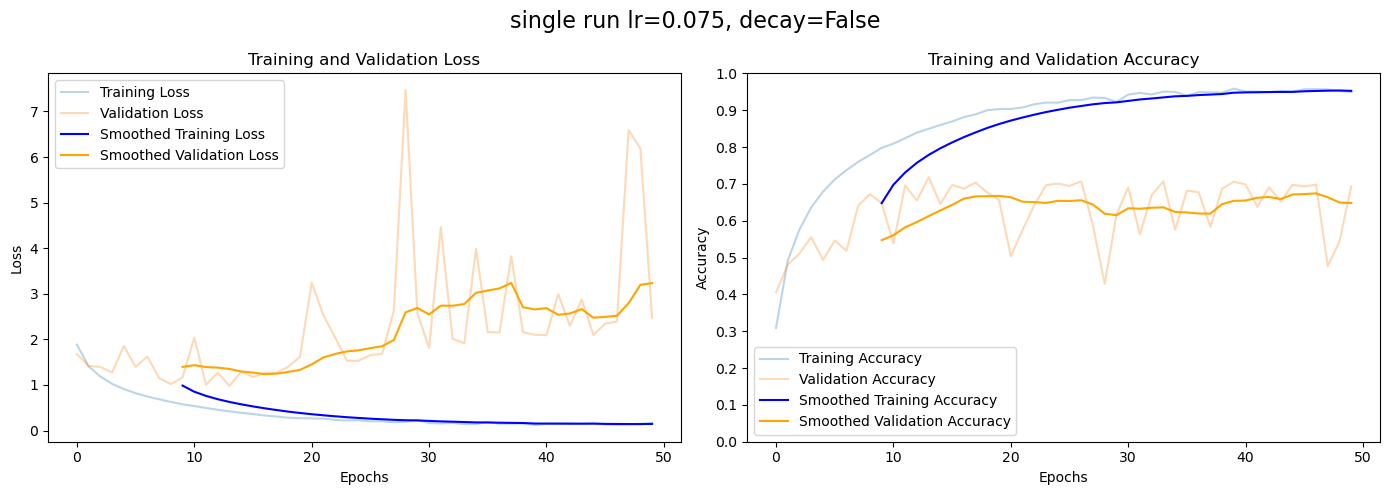

TESTING COMPLETE!!
Test Loss: 2.4009, Test Acc: 0.7008
              precision    recall  f1-score   support

       plane       0.78      0.69      0.73      1000
         car       0.85      0.80      0.82      1000
        bird       0.59      0.61      0.60      1000
         cat       0.50      0.57      0.53      1000
        deer       0.66      0.62      0.64      1000
         dog       0.67      0.54      0.59      1000
        frog       0.72      0.80      0.76      1000
       horse       0.72      0.78      0.75      1000
        ship       0.81      0.79      0.80      1000
       truck       0.75      0.82      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

lr:  0.075
seed: 3
Epoch [1/50] - Train Loss: 1.9038, Acc: 0.3023 | Val Loss: 2.3914, Acc: 0.2496
Epoch [2/50] - Train Loss: 1.4052, Acc: 0.4920 | Val Loss: 1.4660, Acc: 0.4543
Epoch [3/

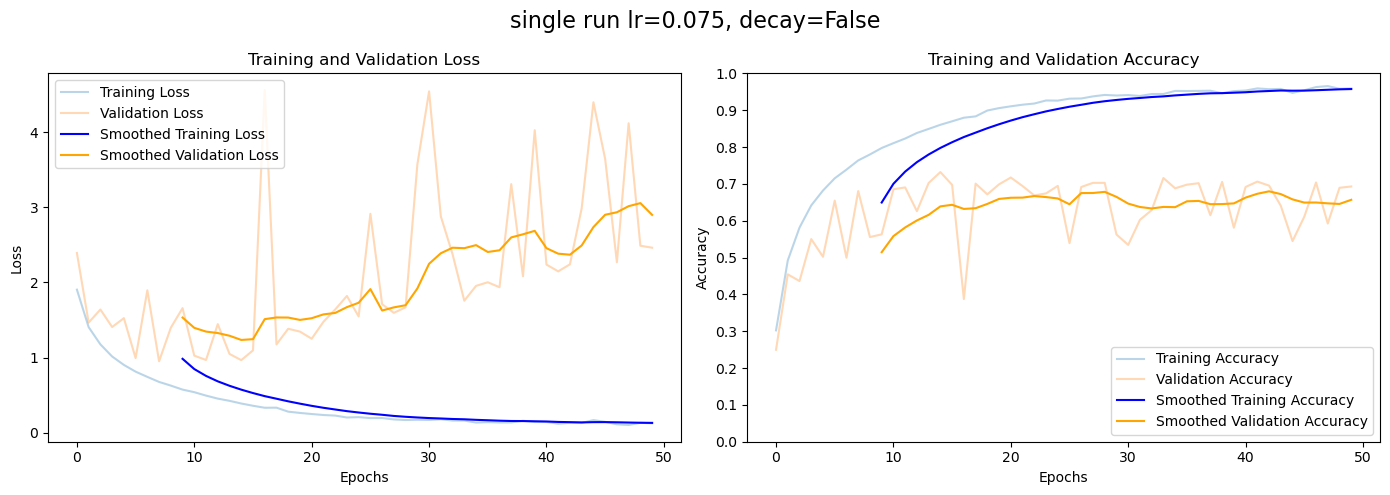

TESTING COMPLETE!!
Test Loss: 2.4628, Test Acc: 0.6966
              precision    recall  f1-score   support

       plane       0.70      0.77      0.73      1000
         car       0.74      0.89      0.81      1000
        bird       0.61      0.60      0.60      1000
         cat       0.54      0.47      0.50      1000
        deer       0.73      0.50      0.59      1000
         dog       0.62      0.60      0.61      1000
        frog       0.73      0.81      0.77      1000
       horse       0.67      0.80      0.73      1000
        ship       0.82      0.79      0.81      1000
       truck       0.79      0.74      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

lr:  0.075
seed: 4
Epoch [1/50] - Train Loss: 1.9101, Acc: 0.2962 | Val Loss: 2.0462, Acc: 0.2765
Epoch [2/50] - Train Loss: 1.3965, Acc: 0.4966 | Val Loss: 2.5040, Acc: 0.3081
Epoch [3/

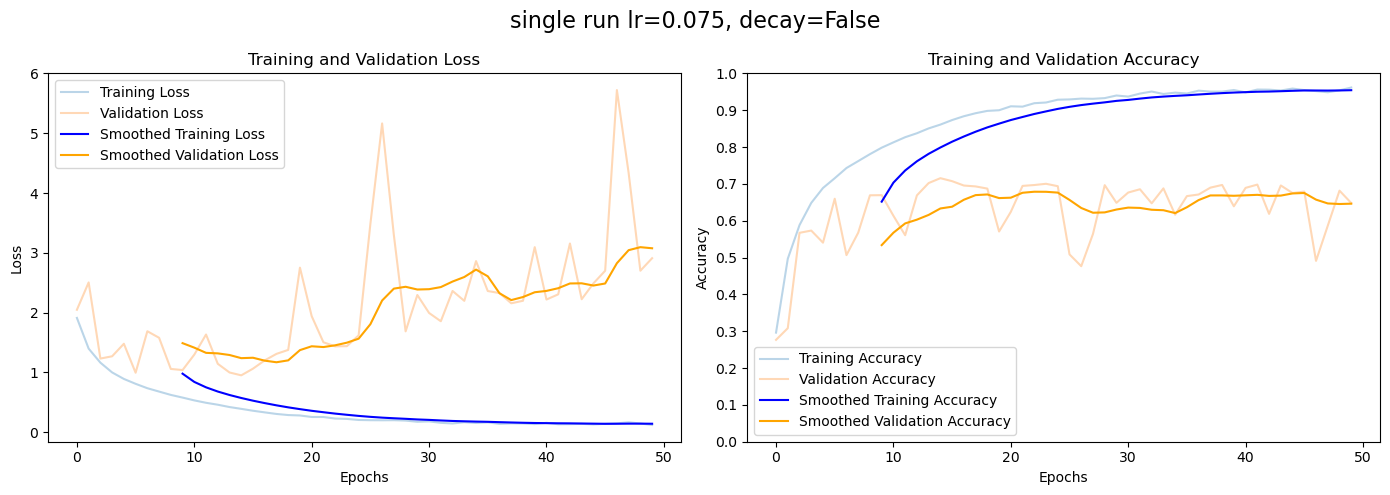

TESTING COMPLETE!!
Test Loss: 2.8966, Test Acc: 0.6498
              precision    recall  f1-score   support

       plane       0.74      0.57      0.64      1000
         car       0.79      0.77      0.78      1000
        bird       0.63      0.53      0.58      1000
         cat       0.45      0.49      0.47      1000
        deer       0.69      0.49      0.57      1000
         dog       0.53      0.62      0.57      1000
        frog       0.81      0.63      0.71      1000
       horse       0.70      0.76      0.73      1000
        ship       0.54      0.93      0.68      1000
       truck       0.80      0.72      0.76      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.65     10000
weighted avg       0.67      0.65      0.65     10000

lr:  0.075
seed: 5
Epoch [1/50] - Train Loss: 1.8307, Acc: 0.3296 | Val Loss: 1.9955, Acc: 0.3125
Epoch [2/50] - Train Loss: 1.3879, Acc: 0.4961 | Val Loss: 1.5903, Acc: 0.4096
Epoch [3/

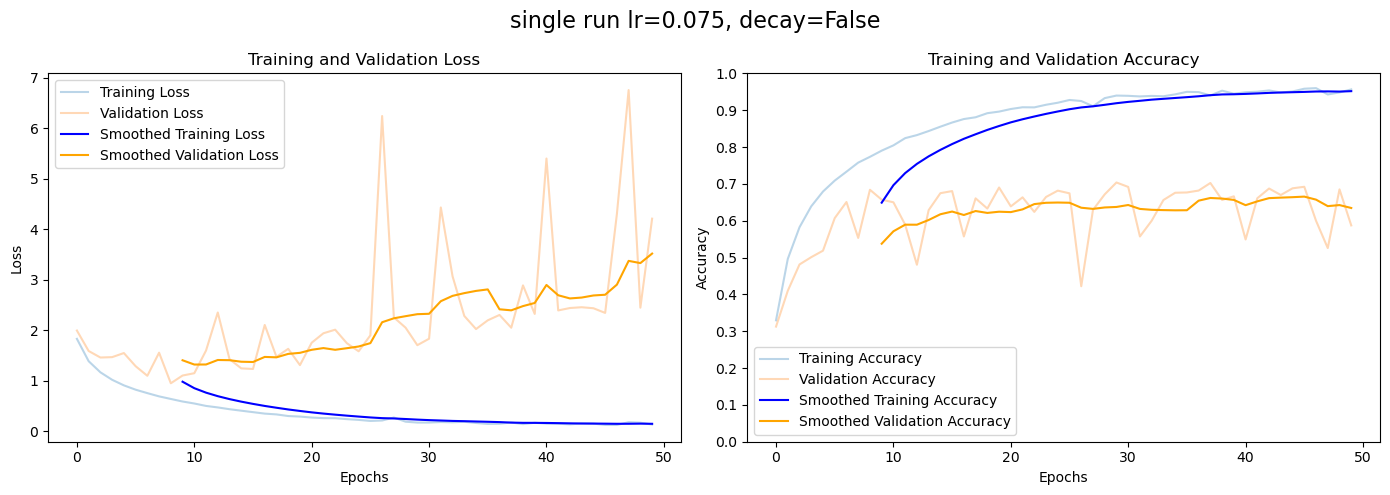

TESTING COMPLETE!!
Test Loss: 4.2347, Test Acc: 0.5853
              precision    recall  f1-score   support

       plane       0.85      0.36      0.51      1000
         car       0.82      0.68      0.74      1000
        bird       0.56      0.31      0.40      1000
         cat       0.31      0.67      0.42      1000
        deer       0.52      0.60      0.56      1000
         dog       0.51      0.51      0.51      1000
        frog       0.69      0.64      0.66      1000
       horse       0.73      0.66      0.69      1000
        ship       0.79      0.65      0.71      1000
       truck       0.63      0.78      0.70      1000

    accuracy                           0.58     10000
   macro avg       0.64      0.58      0.59     10000
weighted avg       0.64      0.58      0.59     10000



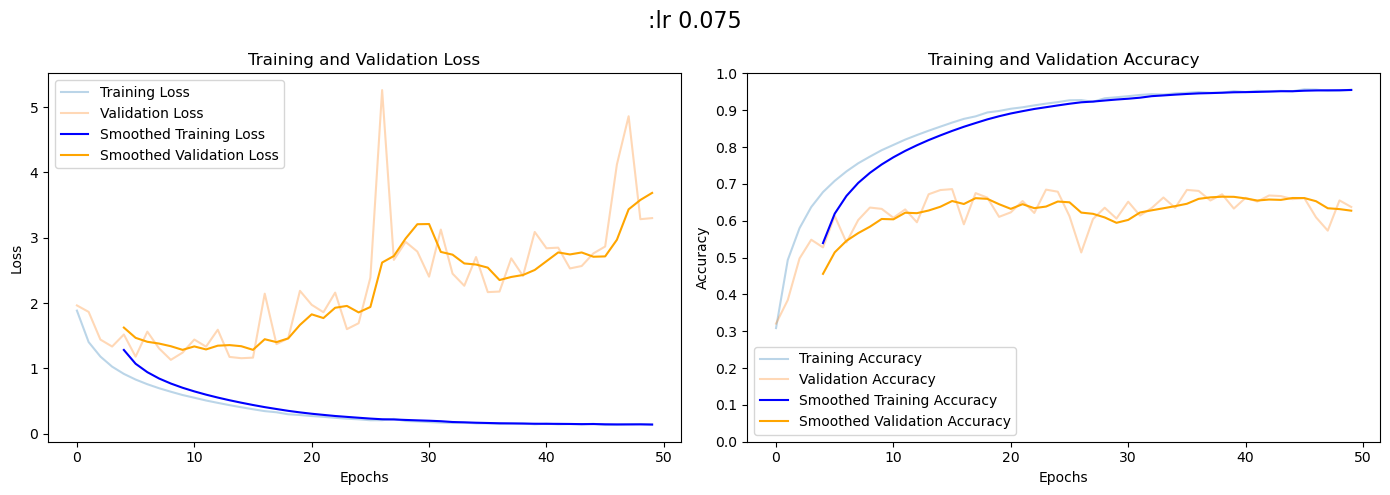

LR:  0.05
lr:  0.05
seed: 1
Epoch [1/50] - Train Loss: 1.9892, Acc: 0.2738 | Val Loss: 1.7180, Acc: 0.3584
Epoch [2/50] - Train Loss: 1.5039, Acc: 0.4577 | Val Loss: 2.0815, Acc: 0.3188
Epoch [3/50] - Train Loss: 1.3113, Acc: 0.5312 | Val Loss: 1.5835, Acc: 0.4555
Epoch [4/50] - Train Loss: 1.1724, Acc: 0.5825 | Val Loss: 1.4008, Acc: 0.5144
Epoch [5/50] - Train Loss: 1.0623, Acc: 0.6232 | Val Loss: 1.1556, Acc: 0.5868
Epoch [6/50] - Train Loss: 0.9758, Acc: 0.6546 | Val Loss: 1.3662, Acc: 0.5520
Epoch [7/50] - Train Loss: 0.9048, Acc: 0.6801 | Val Loss: 1.5521, Acc: 0.5083
Epoch [8/50] - Train Loss: 0.8455, Acc: 0.7016 | Val Loss: 1.2507, Acc: 0.5811
Epoch [9/50] - Train Loss: 0.7896, Acc: 0.7227 | Val Loss: 1.3134, Acc: 0.5481
Epoch [10/50] - Train Loss: 0.7388, Acc: 0.7401 | Val Loss: 1.6902, Acc: 0.5413
Epoch [11/50] - Train Loss: 0.6925, Acc: 0.7556 | Val Loss: 2.8274, Acc: 0.3879
Epoch [12/50] - Train Loss: 0.6520, Acc: 0.7707 | Val Loss: 1.0198, Acc: 0.6766
Epoch [13/50] - Train

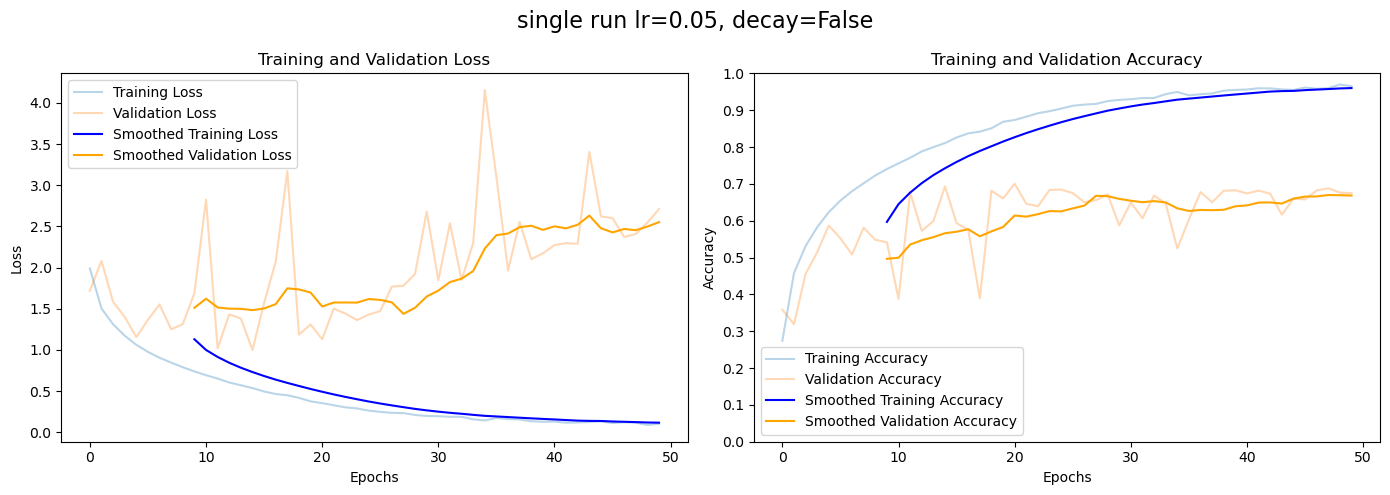

TESTING COMPLETE!!
Test Loss: 2.6751, Test Acc: 0.6692
              precision    recall  f1-score   support

       plane       0.71      0.75      0.73      1000
         car       0.87      0.69      0.77      1000
        bird       0.62      0.55      0.58      1000
         cat       0.41      0.62      0.49      1000
        deer       0.67      0.59      0.63      1000
         dog       0.62      0.48      0.54      1000
        frog       0.80      0.69      0.74      1000
       horse       0.66      0.76      0.71      1000
        ship       0.82      0.78      0.80      1000
       truck       0.71      0.78      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000

lr:  0.05
seed: 2
Epoch [1/50] - Train Loss: 1.9799, Acc: 0.2710 | Val Loss: 1.7683, Acc: 0.3584
Epoch [2/50] - Train Loss: 1.4988, Acc: 0.4576 | Val Loss: 1.5674, Acc: 0.4191
Epoch [3/5

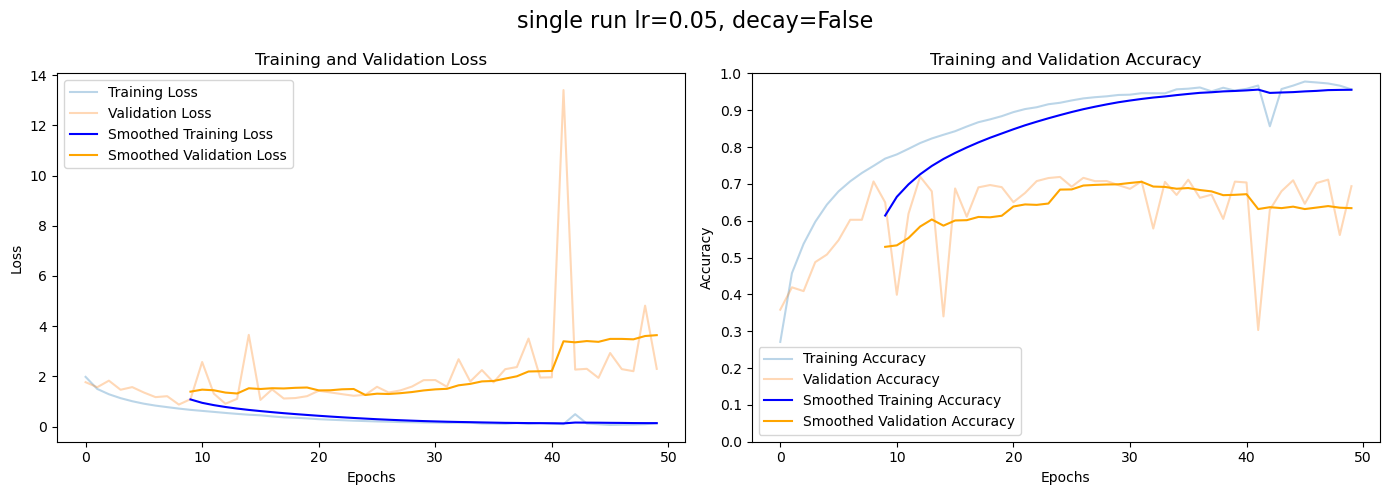

TESTING COMPLETE!!
Test Loss: 2.3650, Test Acc: 0.6923
              precision    recall  f1-score   support

       plane       0.63      0.84      0.72      1000
         car       0.79      0.82      0.80      1000
        bird       0.64      0.55      0.59      1000
         cat       0.59      0.40      0.47      1000
        deer       0.59      0.70      0.64      1000
         dog       0.60      0.61      0.60      1000
        frog       0.71      0.84      0.77      1000
       horse       0.81      0.68      0.74      1000
        ship       0.89      0.69      0.78      1000
       truck       0.73      0.81      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

lr:  0.05
seed: 3
Epoch [1/50] - Train Loss: 2.0019, Acc: 0.2646 | Val Loss: 2.0755, Acc: 0.2455
Epoch [2/50] - Train Loss: 1.5175, Acc: 0.4486 | Val Loss: 1.6645, Acc: 0.3966
Epoch [3/5

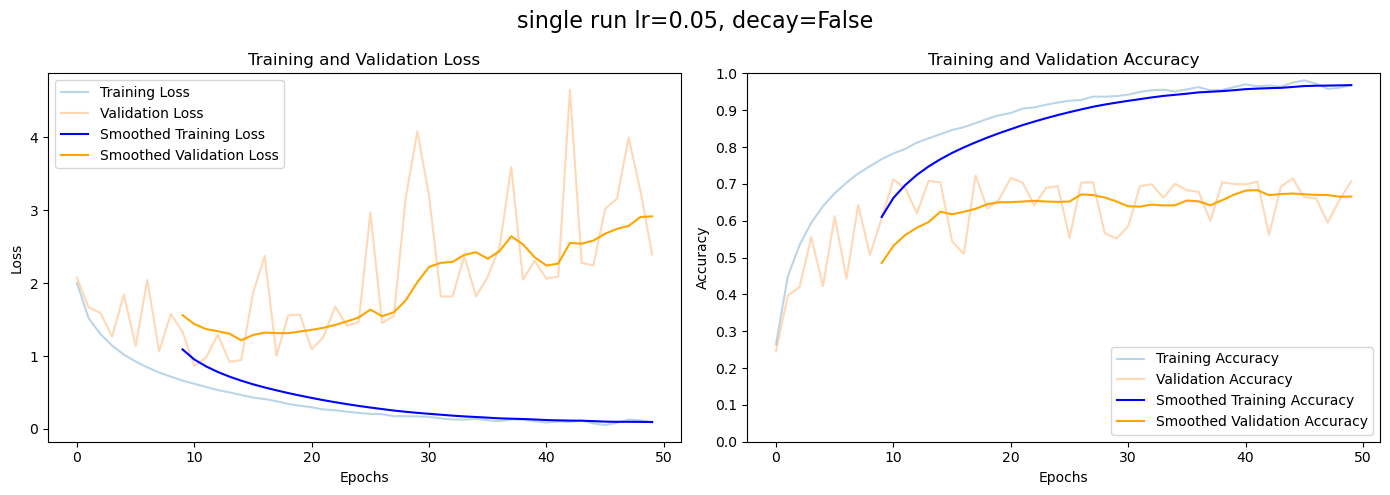

TESTING COMPLETE!!
Test Loss: 2.3105, Test Acc: 0.7146
              precision    recall  f1-score   support

       plane       0.70      0.77      0.73      1000
         car       0.85      0.85      0.85      1000
        bird       0.59      0.64      0.61      1000
         cat       0.50      0.57      0.53      1000
        deer       0.72      0.63      0.67      1000
         dog       0.64      0.58      0.61      1000
        frog       0.81      0.73      0.77      1000
       horse       0.76      0.74      0.75      1000
        ship       0.80      0.86      0.83      1000
       truck       0.82      0.78      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.72     10000
weighted avg       0.72      0.71      0.72     10000

lr:  0.05
seed: 4
Epoch [1/50] - Train Loss: 2.0072, Acc: 0.2563 | Val Loss: 2.0928, Acc: 0.2599
Epoch [2/50] - Train Loss: 1.5000, Acc: 0.4566 | Val Loss: 2.1212, Acc: 0.3145
Epoch [3/5

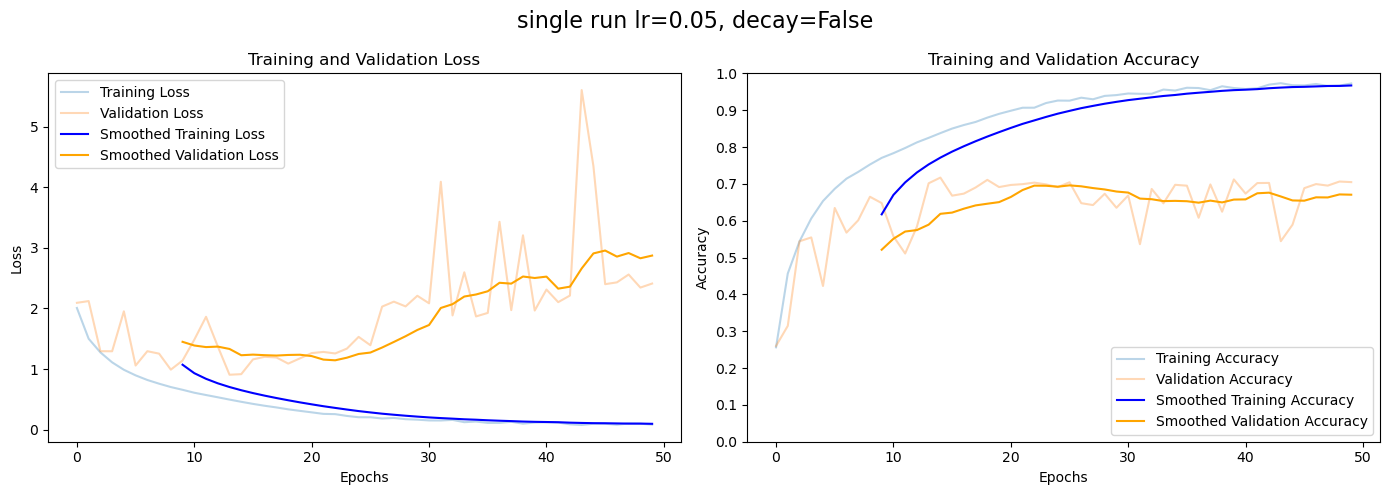

TESTING COMPLETE!!
Test Loss: 2.3753, Test Acc: 0.7046
              precision    recall  f1-score   support

       plane       0.75      0.71      0.73      1000
         car       0.83      0.80      0.81      1000
        bird       0.61      0.64      0.62      1000
         cat       0.53      0.47      0.50      1000
        deer       0.66      0.68      0.67      1000
         dog       0.58      0.62      0.60      1000
        frog       0.75      0.80      0.77      1000
       horse       0.75      0.76      0.76      1000
        ship       0.79      0.81      0.80      1000
       truck       0.82      0.77      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

lr:  0.05
seed: 5
Epoch [1/50] - Train Loss: 1.9158, Acc: 0.2988 | Val Loss: 1.7687, Acc: 0.3414
Epoch [2/50] - Train Loss: 1.4774, Acc: 0.4667 | Val Loss: 1.6559, Acc: 0.3867
Epoch [3/5

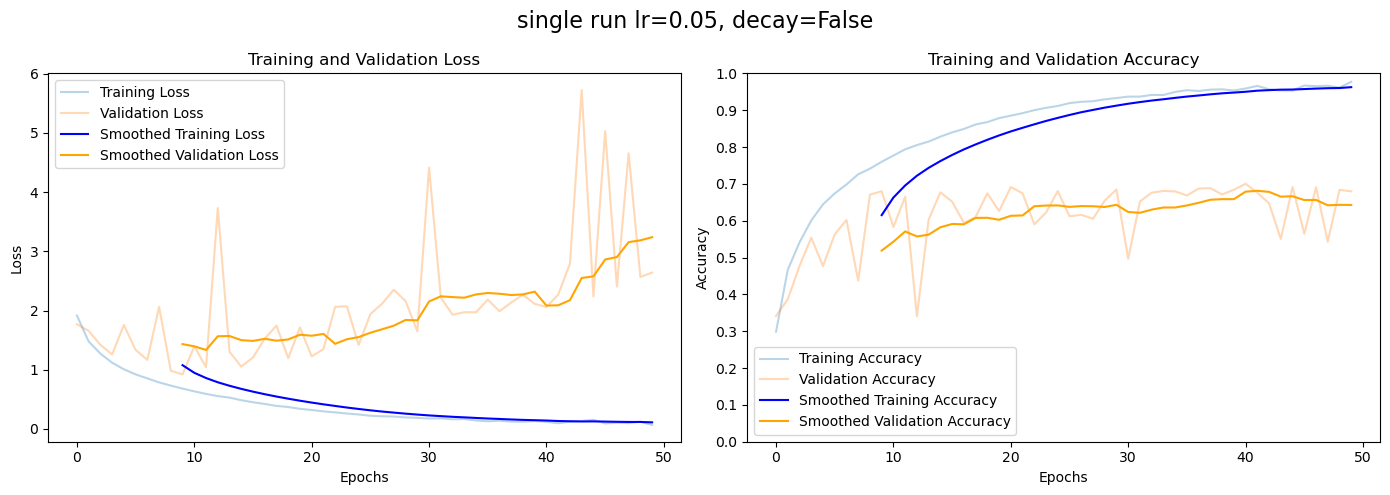

TESTING COMPLETE!!
Test Loss: 2.5549, Test Acc: 0.6852
              precision    recall  f1-score   support

       plane       0.71      0.78      0.74      1000
         car       0.80      0.82      0.81      1000
        bird       0.74      0.43      0.54      1000
         cat       0.45      0.53      0.48      1000
        deer       0.63      0.59      0.61      1000
         dog       0.54      0.65      0.59      1000
        frog       0.73      0.78      0.76      1000
       horse       0.81      0.69      0.75      1000
        ship       0.81      0.79      0.80      1000
       truck       0.74      0.80      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.68     10000
weighted avg       0.70      0.69      0.68     10000



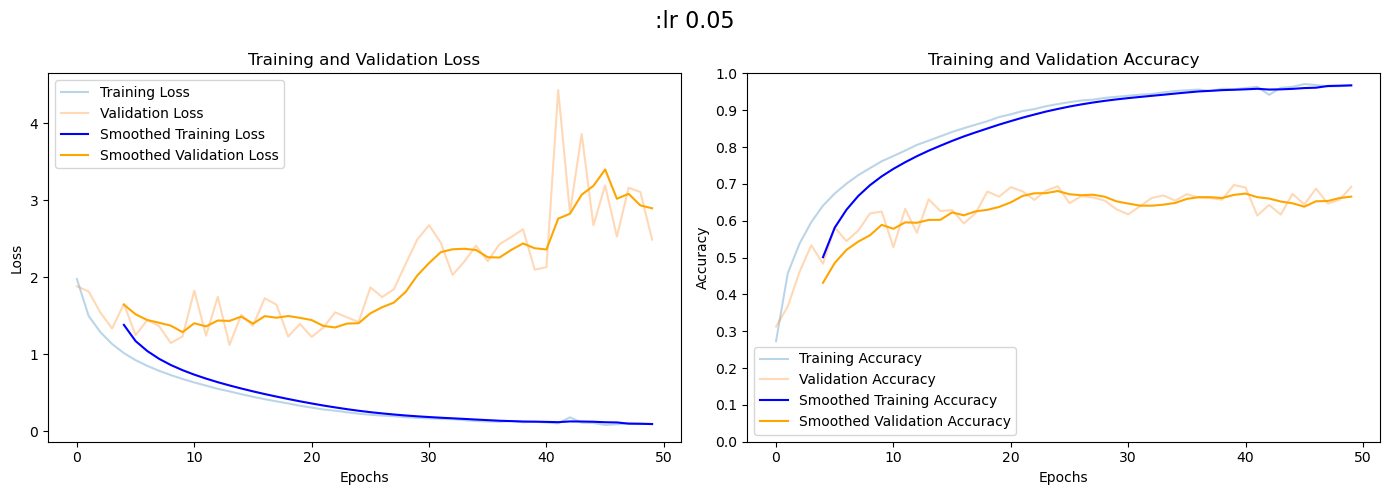

LR:  0.025
lr:  0.025
seed: 1
Epoch [1/50] - Train Loss: 2.1809, Acc: 0.2002 | Val Loss: 1.9697, Acc: 0.2462
Epoch [2/50] - Train Loss: 1.7110, Acc: 0.3826 | Val Loss: 2.0347, Acc: 0.2666
Epoch [3/50] - Train Loss: 1.4857, Acc: 0.4639 | Val Loss: 1.6832, Acc: 0.4055
Epoch [4/50] - Train Loss: 1.3629, Acc: 0.5096 | Val Loss: 1.5566, Acc: 0.4521
Epoch [5/50] - Train Loss: 1.2615, Acc: 0.5497 | Val Loss: 1.3842, Acc: 0.4842
Epoch [6/50] - Train Loss: 1.1746, Acc: 0.5846 | Val Loss: 1.4629, Acc: 0.4822
Epoch [7/50] - Train Loss: 1.0988, Acc: 0.6143 | Val Loss: 1.5861, Acc: 0.4638
Epoch [8/50] - Train Loss: 1.0337, Acc: 0.6357 | Val Loss: 1.6497, Acc: 0.4652
Epoch [9/50] - Train Loss: 0.9816, Acc: 0.6530 | Val Loss: 1.4796, Acc: 0.4945
Epoch [10/50] - Train Loss: 0.9320, Acc: 0.6723 | Val Loss: 1.3567, Acc: 0.5479
Epoch [11/50] - Train Loss: 0.8862, Acc: 0.6868 | Val Loss: 1.3313, Acc: 0.5524
Epoch [12/50] - Train Loss: 0.8459, Acc: 0.6999 | Val Loss: 1.1916, Acc: 0.6092
Epoch [13/50] - Tra

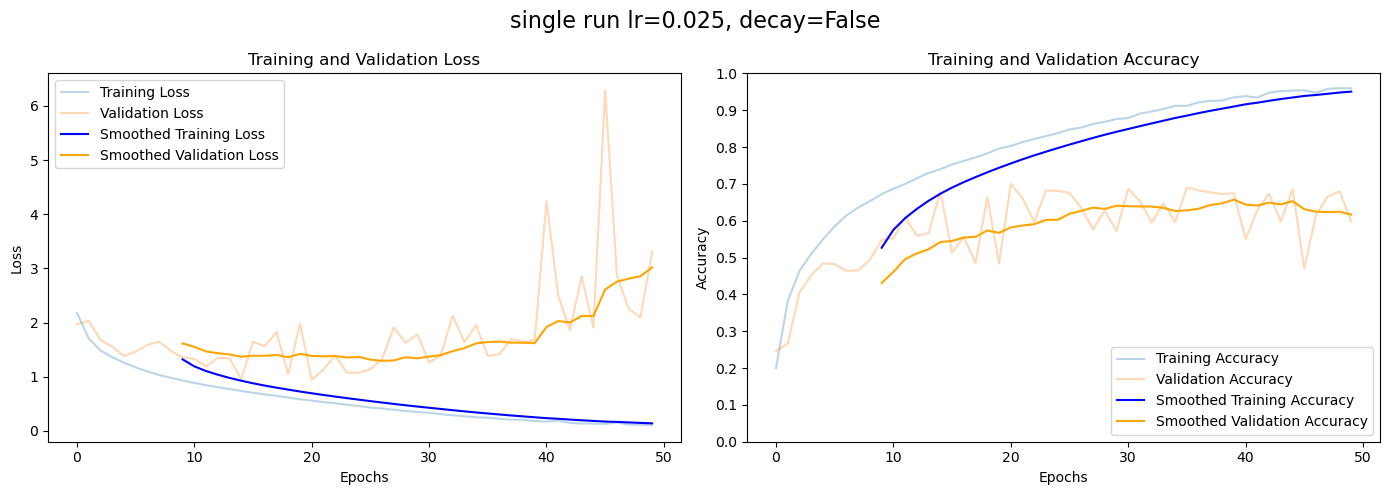

TESTING COMPLETE!!
Test Loss: 3.1988, Test Acc: 0.6097
              precision    recall  f1-score   support

       plane       0.71      0.72      0.71      1000
         car       0.84      0.71      0.77      1000
        bird       0.36      0.74      0.49      1000
         cat       0.50      0.37      0.42      1000
        deer       0.54      0.58      0.56      1000
         dog       0.62      0.45      0.52      1000
        frog       0.96      0.15      0.26      1000
       horse       0.63      0.80      0.70      1000
        ship       0.84      0.75      0.79      1000
       truck       0.66      0.83      0.74      1000

    accuracy                           0.61     10000
   macro avg       0.67      0.61      0.60     10000
weighted avg       0.67      0.61      0.60     10000

lr:  0.025
seed: 2
Epoch [1/50] - Train Loss: 2.1508, Acc: 0.2088 | Val Loss: 1.9922, Acc: 0.2814
Epoch [2/50] - Train Loss: 1.7170, Acc: 0.3778 | Val Loss: 1.6828, Acc: 0.3758
Epoch [3/

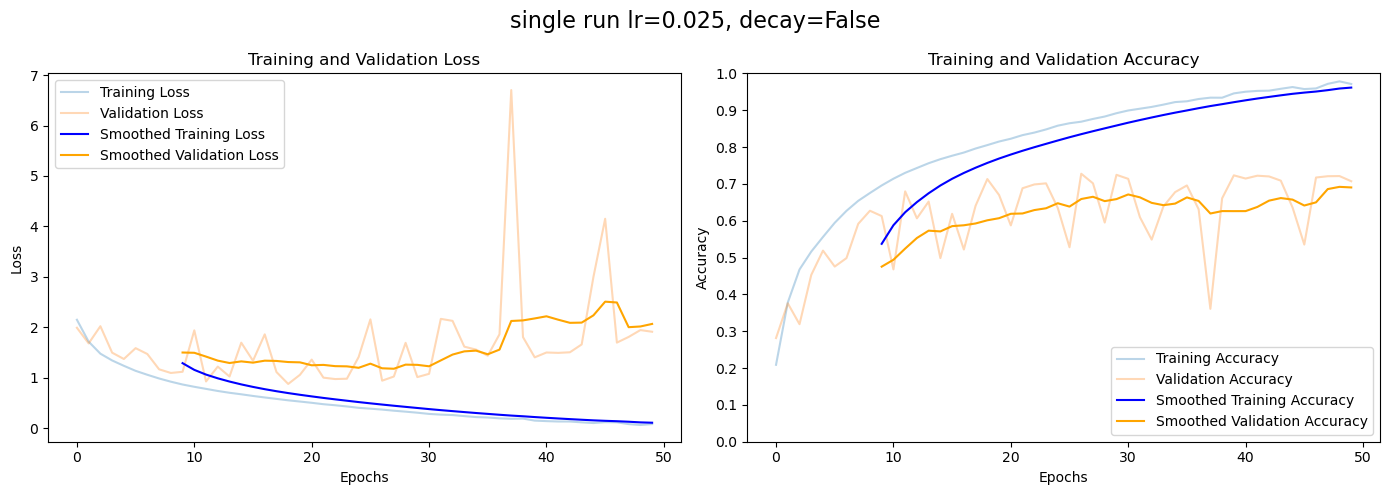

TESTING COMPLETE!!
Test Loss: 1.9641, Test Acc: 0.7068
              precision    recall  f1-score   support

       plane       0.68      0.80      0.73      1000
         car       0.84      0.82      0.83      1000
        bird       0.69      0.51      0.58      1000
         cat       0.64      0.34      0.44      1000
        deer       0.65      0.65      0.65      1000
         dog       0.60      0.67      0.63      1000
        frog       0.66      0.83      0.74      1000
       horse       0.69      0.82      0.75      1000
        ship       0.85      0.82      0.83      1000
       truck       0.77      0.82      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000

lr:  0.025
seed: 3
Epoch [1/50] - Train Loss: 2.1762, Acc: 0.1941 | Val Loss: 2.1379, Acc: 0.2464
Epoch [2/50] - Train Loss: 1.7436, Acc: 0.3729 | Val Loss: 1.6788, Acc: 0.3807
Epoch [3/

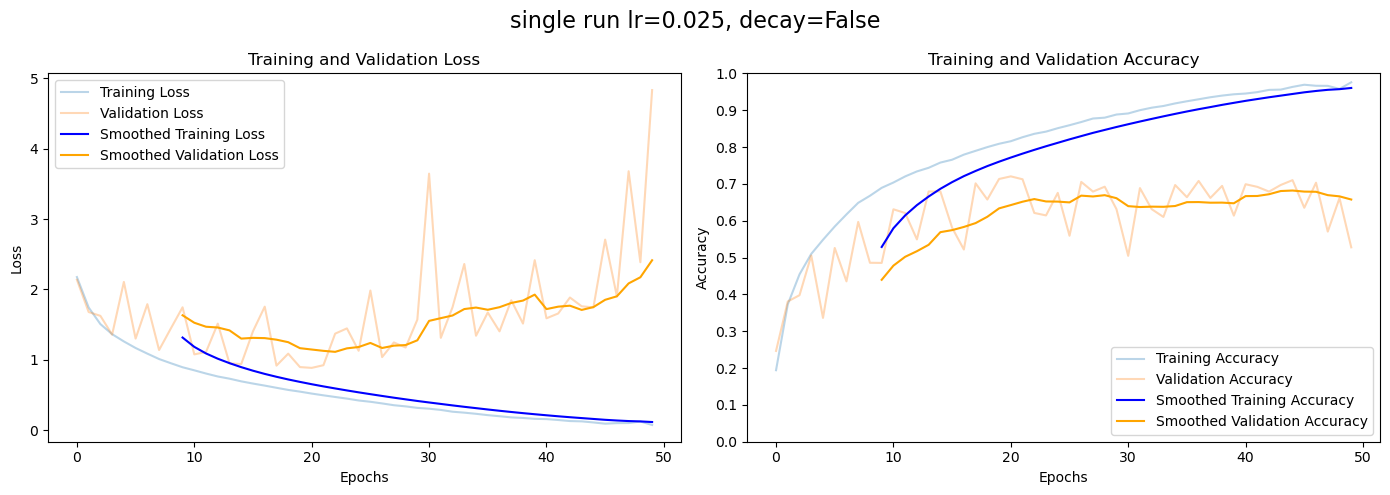

TESTING COMPLETE!!
Test Loss: 4.8760, Test Acc: 0.5189
              precision    recall  f1-score   support

       plane       0.69      0.70      0.69      1000
         car       0.74      0.73      0.73      1000
        bird       0.68      0.39      0.50      1000
         cat       0.35      0.35      0.35      1000
        deer       0.73      0.29      0.42      1000
         dog       0.24      0.90      0.38      1000
        frog       0.71      0.57      0.63      1000
       horse       0.79      0.50      0.61      1000
        ship       0.85      0.67      0.75      1000
       truck       0.95      0.08      0.15      1000

    accuracy                           0.52     10000
   macro avg       0.67      0.52      0.52     10000
weighted avg       0.67      0.52      0.52     10000

lr:  0.025
seed: 4
Epoch [1/50] - Train Loss: 2.1759, Acc: 0.1804 | Val Loss: 1.9802, Acc: 0.2668
Epoch [2/50] - Train Loss: 1.7603, Acc: 0.3632 | Val Loss: 1.7493, Acc: 0.3511
Epoch [3/

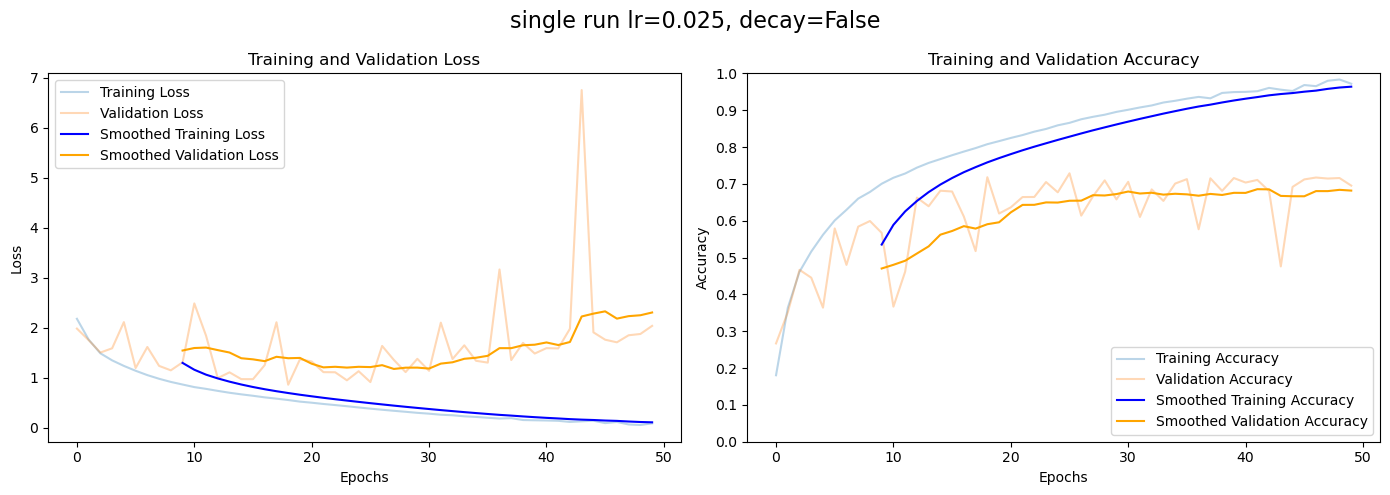

TESTING COMPLETE!!
Test Loss: 2.0240, Test Acc: 0.6980
              precision    recall  f1-score   support

       plane       0.73      0.75      0.74      1000
         car       0.78      0.84      0.81      1000
        bird       0.64      0.61      0.63      1000
         cat       0.47      0.58      0.52      1000
        deer       0.82      0.49      0.61      1000
         dog       0.55      0.66      0.60      1000
        frog       0.83      0.69      0.75      1000
       horse       0.76      0.74      0.75      1000
        ship       0.81      0.81      0.81      1000
       truck       0.72      0.80      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

lr:  0.025
seed: 5
Epoch [1/50] - Train Loss: 2.0750, Acc: 0.2418 | Val Loss: 1.8692, Acc: 0.3131
Epoch [2/50] - Train Loss: 1.6547, Acc: 0.3970 | Val Loss: 1.8273, Acc: 0.3246
Epoch [3/

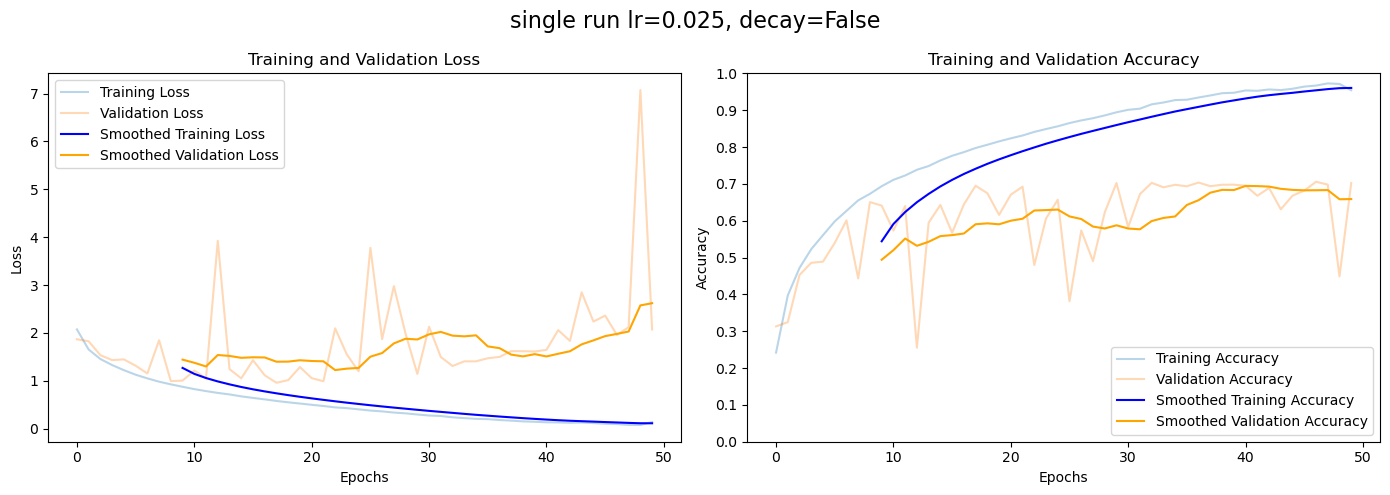

TESTING COMPLETE!!
Test Loss: 2.1697, Test Acc: 0.6919
              precision    recall  f1-score   support

       plane       0.69      0.80      0.74      1000
         car       0.82      0.83      0.83      1000
        bird       0.62      0.57      0.59      1000
         cat       0.47      0.51      0.49      1000
        deer       0.73      0.56      0.63      1000
         dog       0.52      0.60      0.56      1000
        frog       0.76      0.75      0.75      1000
       horse       0.73      0.75      0.74      1000
        ship       0.81      0.80      0.80      1000
       truck       0.82      0.76      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



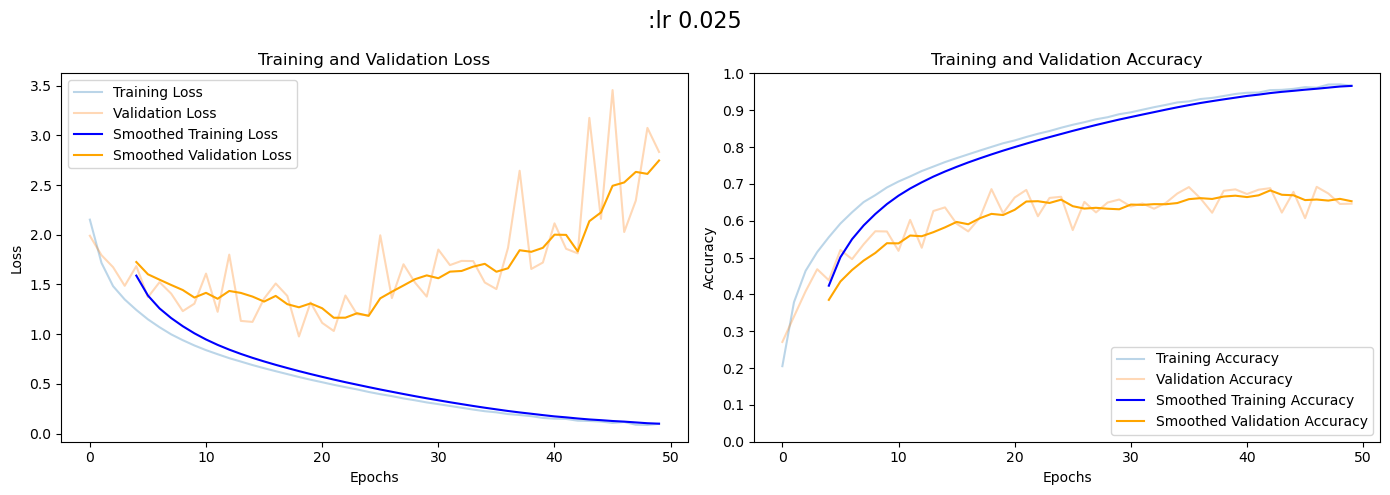

LR:  0.01
lr:  0.01
seed: 1
Epoch [1/50] - Train Loss: 2.2978, Acc: 0.1197 | Val Loss: 2.2866, Acc: 0.1707
Epoch [2/50] - Train Loss: 2.1681, Acc: 0.2265 | Val Loss: 2.0136, Acc: 0.2716
Epoch [3/50] - Train Loss: 1.8821, Acc: 0.3236 | Val Loss: 1.8341, Acc: 0.3445
Epoch [4/50] - Train Loss: 1.6687, Acc: 0.3962 | Val Loss: 1.6732, Acc: 0.3930
Epoch [5/50] - Train Loss: 1.5371, Acc: 0.4458 | Val Loss: 1.5499, Acc: 0.4308
Epoch [6/50] - Train Loss: 1.4522, Acc: 0.4741 | Val Loss: 1.5844, Acc: 0.4132
Epoch [7/50] - Train Loss: 1.3901, Acc: 0.4977 | Val Loss: 1.6288, Acc: 0.4106
Epoch [8/50] - Train Loss: 1.3364, Acc: 0.5218 | Val Loss: 1.7859, Acc: 0.4017
Epoch [9/50] - Train Loss: 1.2894, Acc: 0.5370 | Val Loss: 1.4918, Acc: 0.4523
Epoch [10/50] - Train Loss: 1.2413, Acc: 0.5587 | Val Loss: 1.6665, Acc: 0.4438
Epoch [11/50] - Train Loss: 1.2001, Acc: 0.5741 | Val Loss: 1.6226, Acc: 0.4276
Epoch [12/50] - Train Loss: 1.1590, Acc: 0.5912 | Val Loss: 1.3533, Acc: 0.5311
Epoch [13/50] - Train

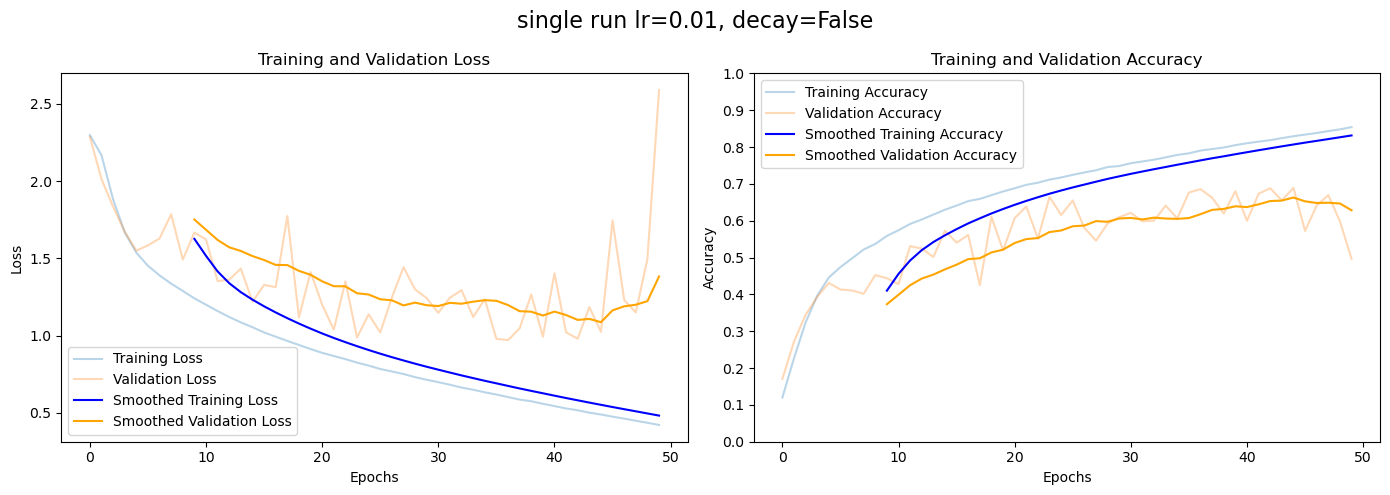

TESTING COMPLETE!!
Test Loss: 2.5774, Test Acc: 0.5071
              precision    recall  f1-score   support

       plane       0.72      0.66      0.69      1000
         car       0.82      0.72      0.77      1000
        bird       0.76      0.18      0.29      1000
         cat       0.54      0.28      0.37      1000
        deer       0.21      0.94      0.35      1000
         dog       0.84      0.20      0.33      1000
        frog       0.90      0.12      0.21      1000
       horse       0.61      0.72      0.66      1000
        ship       0.86      0.71      0.78      1000
       truck       0.89      0.52      0.66      1000

    accuracy                           0.51     10000
   macro avg       0.72      0.51      0.51     10000
weighted avg       0.72      0.51      0.51     10000

lr:  0.01
seed: 2
Epoch [1/50] - Train Loss: 2.2968, Acc: 0.1290 | Val Loss: 2.2801, Acc: 0.1709
Epoch [2/50] - Train Loss: 2.1045, Acc: 0.2497 | Val Loss: 1.9719, Acc: 0.2900
Epoch [3/5

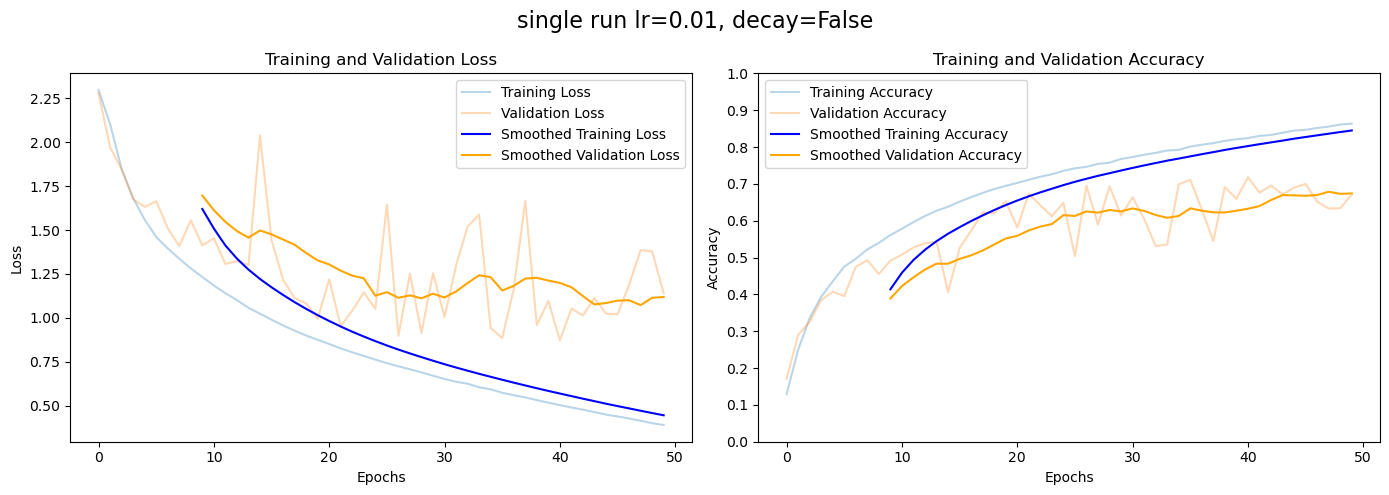

TESTING COMPLETE!!
Test Loss: 1.1294, Test Acc: 0.6757
              precision    recall  f1-score   support

       plane       0.78      0.71      0.74      1000
         car       0.86      0.74      0.80      1000
        bird       0.72      0.42      0.53      1000
         cat       0.58      0.34      0.43      1000
        deer       0.72      0.47      0.57      1000
         dog       0.58      0.66      0.62      1000
        frog       0.55      0.93      0.69      1000
       horse       0.58      0.88      0.70      1000
        ship       0.90      0.74      0.81      1000
       truck       0.70      0.87      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.67     10000
weighted avg       0.70      0.68      0.67     10000

lr:  0.01
seed: 3
Epoch [1/50] - Train Loss: 2.2920, Acc: 0.1281 | Val Loss: 2.2659, Acc: 0.1657
Epoch [2/50] - Train Loss: 2.1360, Acc: 0.2329 | Val Loss: 2.0464, Acc: 0.2636
Epoch [3/5

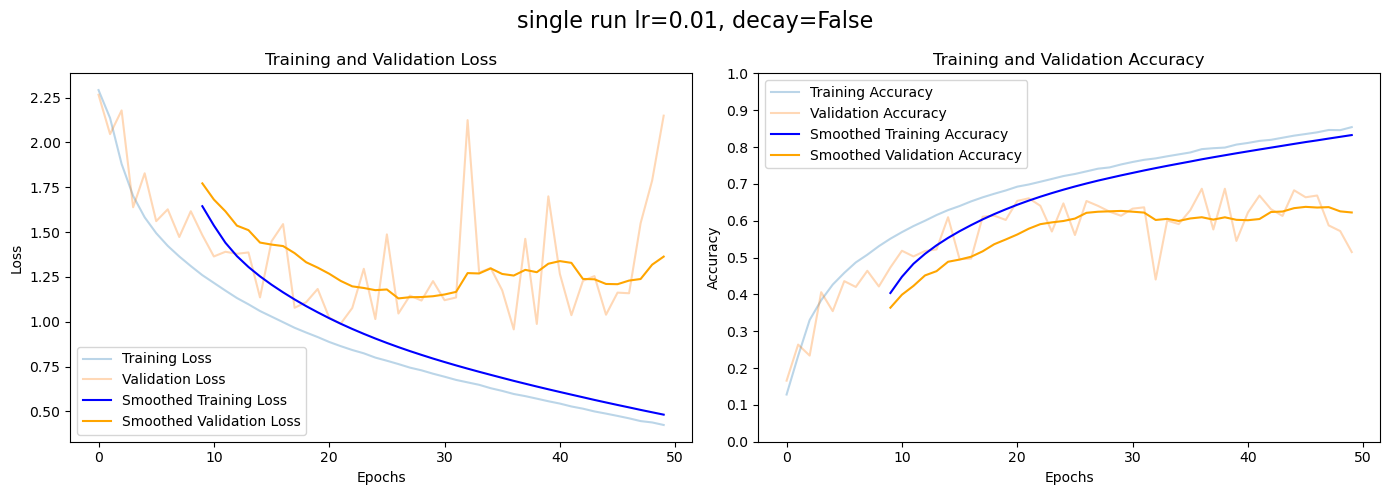

TESTING COMPLETE!!
Test Loss: 2.1955, Test Acc: 0.5075
              precision    recall  f1-score   support

       plane       0.63      0.80      0.71      1000
         car       0.81      0.69      0.74      1000
        bird       0.79      0.26      0.39      1000
         cat       0.50      0.13      0.20      1000
        deer       0.72      0.33      0.45      1000
         dog       0.21      0.96      0.34      1000
        frog       0.88      0.45      0.60      1000
       horse       0.79      0.54      0.64      1000
        ship       0.91      0.63      0.75      1000
       truck       0.97      0.29      0.44      1000

    accuracy                           0.51     10000
   macro avg       0.72      0.51      0.53     10000
weighted avg       0.72      0.51      0.53     10000

lr:  0.01
seed: 4
Epoch [1/50] - Train Loss: 2.2972, Acc: 0.1118 | Val Loss: 2.2822, Acc: 0.1327
Epoch [2/50] - Train Loss: 2.1444, Acc: 0.2133 | Val Loss: 2.0033, Acc: 0.2725
Epoch [3/5

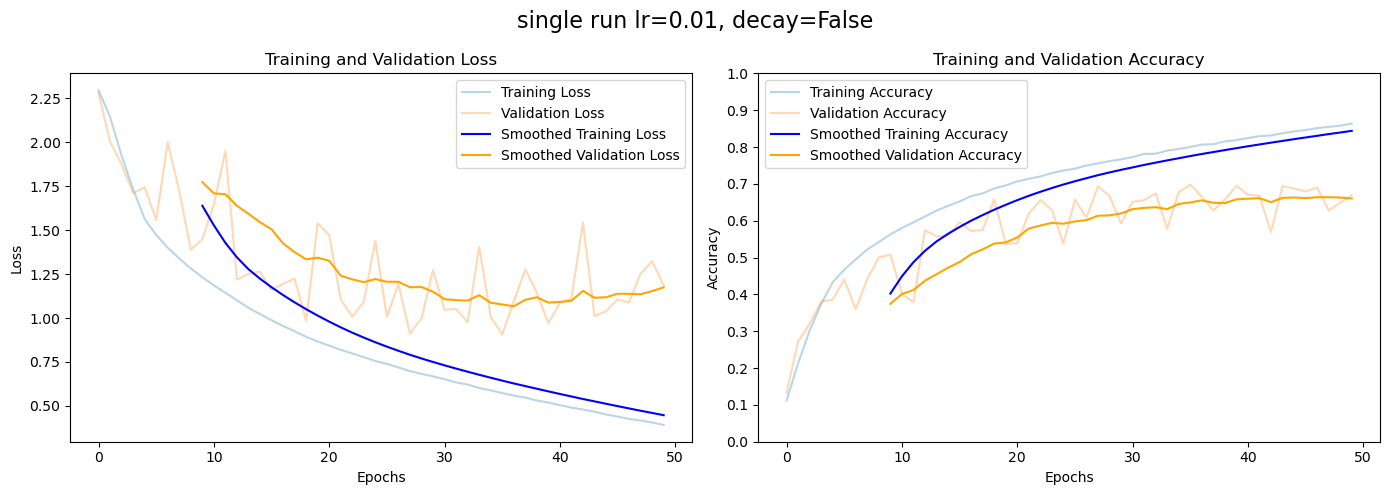

TESTING COMPLETE!!
Test Loss: 1.1612, Test Acc: 0.6669
              precision    recall  f1-score   support

       plane       0.81      0.55      0.65      1000
         car       0.86      0.73      0.79      1000
        bird       0.72      0.53      0.61      1000
         cat       0.44      0.56      0.49      1000
        deer       0.67      0.64      0.65      1000
         dog       0.65      0.58      0.61      1000
        frog       0.92      0.51      0.65      1000
       horse       0.67      0.80      0.73      1000
        ship       0.61      0.91      0.73      1000
       truck       0.62      0.88      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.70      0.67      0.66     10000
weighted avg       0.70      0.67      0.66     10000

lr:  0.01
seed: 5
Epoch [1/50] - Train Loss: 2.2506, Acc: 0.1752 | Val Loss: 2.1223, Acc: 0.2340
Epoch [2/50] - Train Loss: 1.9866, Acc: 0.2897 | Val Loss: 1.9887, Acc: 0.2609
Epoch [3/5

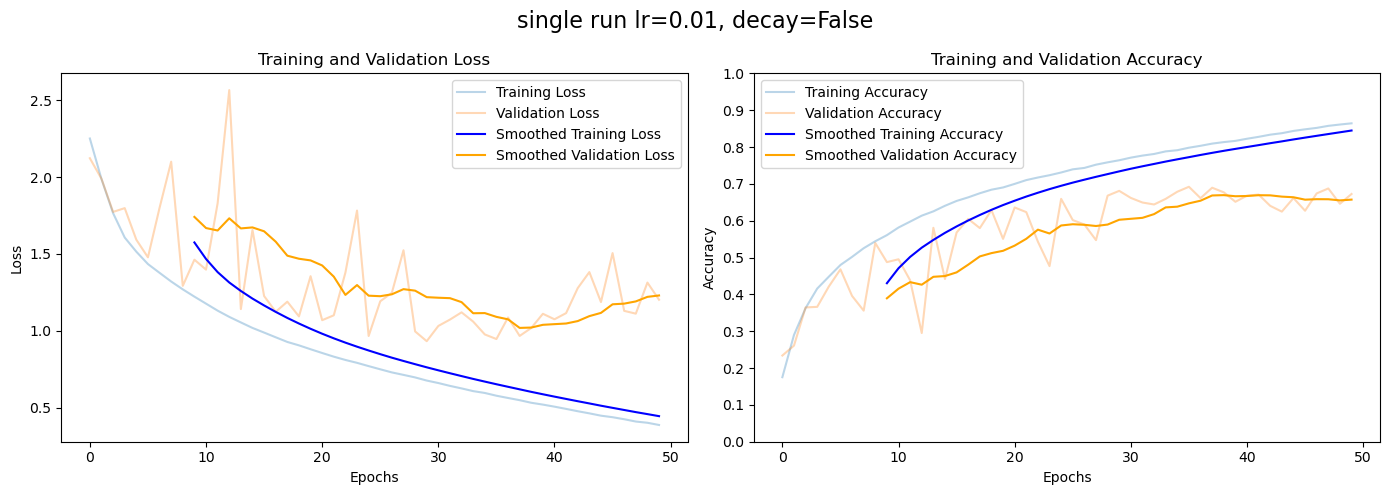

TESTING COMPLETE!!
Test Loss: 1.2271, Test Acc: 0.6632
              precision    recall  f1-score   support

       plane       0.64      0.76      0.69      1000
         car       0.95      0.50      0.65      1000
        bird       0.60      0.60      0.60      1000
         cat       0.48      0.52      0.49      1000
        deer       0.71      0.61      0.66      1000
         dog       0.64      0.53      0.58      1000
        frog       0.72      0.79      0.75      1000
       horse       0.82      0.71      0.76      1000
        ship       0.55      0.92      0.69      1000
       truck       0.79      0.71      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.69      0.66      0.66     10000
weighted avg       0.69      0.66      0.66     10000



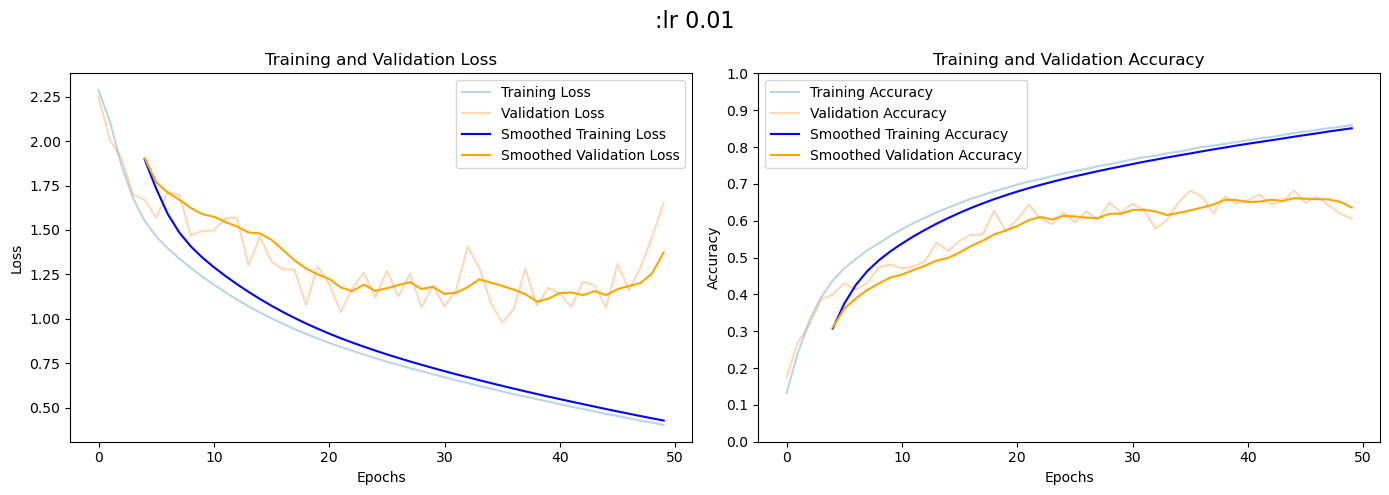

In [19]:
# 1.1 pick learning rate

num_epochs = 50
random_seeds = list(range(1, 6))

learning_rates_for_experiment = [0.1, 0.075, 0.05, 0.025, 0.01]
averaged_results = {lr:{} for lr in learning_rates_for_experiment}
path_to_save = f'./run_data/learning_rates/FINAL.json'
path_to_load = f'./run_data//learning_rates/FINAL.json'
save_experiment = True

for learning_rate in learning_rates_for_experiment:
    
    print('LR: ', learning_rate) 
    epoch_train_losses_by_run = []
    epoch_val_losses_by_run = []
    epoch_train_accuracies_by_run = []
    epoch_val_accuracies_by_run = []
    test_losses = []
    test_accuracies = []
    reports = []
       
    for random_seed in random_seeds:
        
        print('lr: ', learning_rate) 
        print('seed:', random_seed)
        torch.manual_seed(random_seed)
        
        model = BaselineNet().to(device)
        criterion = nn.CrossEntropyLoss()
        optimiser = optim.SGD(model.parameters(), lr=learning_rate)

        model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=False, plot=True)
        epoch_train_losses_by_run.append(train_epoch_losses)
        epoch_val_losses_by_run.append(val_epoch_losses)
        epoch_train_accuracies_by_run.append(train_epoch_accuracy)
        epoch_val_accuracies_by_run.append(val_epoch_accuracy)
        
        test_loss, test_accuracy, report = run_testing(model, device, criterion, test_dataloader)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
        reports.append(report)
    
    average_train_losses = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*epoch_train_losses_by_run)]
    average_val_losses = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*epoch_val_losses_by_run)]
    average_train_accuracies = [sum(epoch_accuracies) / len(epoch_accuracies) for epoch_accuracies in zip(*epoch_train_accuracies_by_run)]
    average_val_accuracies =  [sum(epoch_accuracies) / len(epoch_accuracies) for epoch_accuracies in zip(*epoch_val_accuracies_by_run)]
    
    average_test_loss = sum(test_losses)/len(test_losses)
    average_test_accuracy = sum(test_accuracies)/len(test_accuracies)
    
    averaged_results[learning_rate] = {'seeds':random_seeds,
                                       'av_train_losses': average_train_losses,
                                       'av_val_losses': average_val_losses,
                                       'av_train_acc': average_train_accuracies,
                                       'av_val_acc': average_val_accuracies,
                                       'all_train_losses':epoch_train_losses_by_run,
                                       'all_val_losses': epoch_val_losses_by_run,
                                       'all_train_accuracies': epoch_train_accuracies_by_run,
                                       'all_val_accuracies': epoch_val_accuracies_by_run,
                                       'all_test_losses':test_losses, 
                                       'all_test_accuracies':test_accuracies,
                                       'av_test_loss': average_test_loss,
                                       'av_test_accuracy':average_test_accuracy}
    plot_single_train_val_smoothed(average_train_losses,average_val_losses,average_train_accuracies,average_val_accuracies, num_epochs, smoothing_window=5, title=f':lr {learning_rate}')

if save_experiment:
    with open(path_to_save, 'w') as file:
        json.dump(averaged_results, file, indent=4)  # 'indent' makes the output formatted and easier to read

In [ ]:
# 1.1 pick learning rate

num_epochs = 75
random_seeds = list(range(1, 6))

learning_rates_for_experiment = [0.01]
averaged_results = {lr:{} for lr in learning_rates_for_experiment}
path_to_save = f'./run_data/learning_rates/FINAL_001_Extra.json'
path_to_load = f'./run_data//learning_rates/FINAL_001_Extra.json'
save_experiment = True

for learning_rate in learning_rates_for_experiment:
    
    print('LR: ', learning_rate) 
    epoch_train_losses_by_run = []
    epoch_val_losses_by_run = []
    epoch_train_accuracies_by_run = []
    epoch_val_accuracies_by_run = []
    test_losses = []
    test_accuracies = []
    reports = []
       
    for random_seed in random_seeds:
        
        print('lr: ', learning_rate) 
        print('seed:', random_seed)
        torch.manual_seed(random_seed)
        
        model = BaselineNet().to(device)
        criterion = nn.CrossEntropyLoss()
        optimiser = optim.SGD(model.parameters(), lr=learning_rate)

        model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=False, plot=True)
        epoch_train_losses_by_run.append(train_epoch_losses)
        epoch_val_losses_by_run.append(val_epoch_losses)
        epoch_train_accuracies_by_run.append(train_epoch_accuracy)
        epoch_val_accuracies_by_run.append(val_epoch_accuracy)
        
        test_loss, test_accuracy, report = run_testing(model, device, criterion, test_dataloader)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
        reports.append(report)
    
    average_train_losses = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*epoch_train_losses_by_run)]
    average_val_losses = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*epoch_val_losses_by_run)]
    average_train_accuracies = [sum(epoch_accuracies) / len(epoch_accuracies) for epoch_accuracies in zip(*epoch_train_accuracies_by_run)]
    average_val_accuracies =  [sum(epoch_accuracies) / len(epoch_accuracies) for epoch_accuracies in zip(*epoch_val_accuracies_by_run)]
    
    average_test_loss = sum(test_losses)/len(test_losses)
    average_test_accuracy = sum(test_accuracies)/len(test_accuracies)
    
    averaged_results[learning_rate] = {'seeds':random_seeds,
                                       'av_train_losses': average_train_losses,
                                       'av_val_losses': average_val_losses,
                                       'av_train_acc': average_train_accuracies,
                                       'av_val_acc': average_val_accuracies,
                                       'all_train_losses':epoch_train_losses_by_run,
                                       'all_val_losses': epoch_val_losses_by_run,
                                       'all_train_accuracies': epoch_train_accuracies_by_run,
                                       'all_val_accuracies': epoch_val_accuracies_by_run,
                                       'all_test_losses':test_losses, 
                                       'all_test_accuracies':test_accuracies,
                                       'av_test_loss': average_test_loss,
                                       'av_test_accuracy':average_test_accuracy}
    plot_single_train_val_smoothed(average_train_losses,average_val_losses,average_train_accuracies,average_val_accuracies, num_epochs, smoothing_window=5, title=f':lr {learning_rate}')

if save_experiment:
    with open(path_to_save, 'w') as file:
        json.dump(averaged_results, file, indent=4)  # 'indent' makes the output formatted and easier to read

In [ ]:
# Experiment 1.2 - LR decay

def adjust_initial_learning_rate(optimiser, epoch, initial_lr=0.1, decay_rate=0.75):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:',new_lr)
    return optimiser

num_epochs = 50

initial_learning_rate = 0.15
decay_rate = 0.75

random_seeds = list(range(1, 6))

averaged_results = {decay_rate:{}}
path_to_save = f'./run_data/lr_decay/final_decaying_lr_initial_lr_{initial_learning_rate}_decay_{decay_rate}.json'
path_to_load = f'./run_data/lr_decay/final_decaying_lr_initial_lr_{initial_learning_rate}_decay_{decay_rate}.json'

save_experiment = True

  
epoch_train_losses_by_run = []
epoch_val_losses_by_run = []
epoch_train_accuracies_by_run = []
epoch_val_accuracies_by_run = []
test_losses = []
test_accuracies = []
reports = []
    
for random_seed in random_seeds:
    print('DECAY: ', decay_rate)
    print('seed:', random_seed)
    torch.manual_seed(random_seed)

    model = BaselineNet().to(device)
    criterion = nn.CrossEntropyLoss()
    optimiser = optim.SGD(model.parameters(), lr=initial_learning_rate)

    model,train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, train_report,val_report = run_training_and_validation(model, device, initial_learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=True, scheduler_func=adjust_initial_learning_rate, plot=True)
    epoch_train_losses_by_run.append(train_epoch_losses)
    epoch_val_losses_by_run.append(val_epoch_losses)
    epoch_train_accuracies_by_run.append(train_epoch_accuracy)
    epoch_val_accuracies_by_run.append(val_epoch_accuracy)
    
    test_loss, test_accuracy, report = run_testing(model, device, criterion, test_dataloader)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    reports.append(report)

    
    average_train_losses = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*epoch_train_losses_by_run)]
    average_val_losses = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*epoch_val_losses_by_run)]
    average_train_accuracies = [sum(epoch_accuracies) / len(epoch_accuracies) for epoch_accuracies in zip(*epoch_train_accuracies_by_run)]
    average_val_accuracies =  [sum(epoch_accuracies) / len(epoch_accuracies) for epoch_accuracies in zip(*epoch_val_accuracies_by_run)]
    average_test_loss = sum(test_losses)/len(test_losses)
    average_test_accuracy = sum(test_accuracies)/len(test_accuracies)
    
    averaged_results[decay_rate] = {'seeds':random_seeds,
                                       'av_train_losses': average_train_losses,
                                       'av_val_losses': average_val_losses,
                                       'av_train_acc': average_train_accuracies,
                                       'av_val_acc': average_val_accuracies,
                                       'all_train_losses':epoch_train_losses_by_run,
                                       'all_val_losses': epoch_val_losses_by_run,
                                       'all_train_accuracies': epoch_train_accuracies_by_run,
                                       'all_val_accuracies': epoch_val_accuracies_by_run,
                                       'all_test_losses':test_losses, 
                                       'all_test_accuracies':test_accuracies,
                                       'av_test_loss': average_test_loss,
                                       'av_test_accuracy':average_test_accuracy}
    
    plot_single_train_val_smoothed(average_train_losses,average_val_losses,average_train_accuracies,average_val_accuracies, num_epochs, smoothing_window=5, title=f'DECAY: {decay_rate}')
    
if save_experiment:
    with open(path_to_save, 'w') as file:
        json.dump(averaged_results, file, indent=4)  # 'indent' makes the output formatted and easier to read